# Reading data 

In [2]:
import pandas as pd

#read the data 
dataset = pd.read_csv("data.csv")

#view data 
dataset

,comment,type
0,يعطيكم الصحة,normal
1,عشي عندهما رجال,normal
2,نبيك مغتصب الاطفال المنيوك,aggressive
3,بشير فار حبس خارج ثالثة ابتيدائي جاي اتناقش ما...,normal
4,مول القناة دزيزي جنيت تفرجت الفديو تاعك ولدي ت...,normal
...,...,...
4401,مممتلكت مممتلكت تتحدثون عاليه مرتن تقول ايمام ...,normal
4402,ربي يلعنو رئيس تونس الخنزير بففففف,aggressive
4403,قولك اننا لسنا عرب ههههه اذهبي للمخبر حليلي جي...,aggressive
4404,علاقة للتحرش باللباس الدول لتي تبيح الحرية الج...,normal


In [3]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Required libraries
import emoji
import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Text length analysis 
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))


In [6]:
# Counting emoji
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

In [7]:
dataset['word_count'] = dataset['comment'].apply(lambda x: len(str(x).split(" ")))
dataset['char_count'] = dataset['comment'].str.len() ## this also includes spaces
dataset['avg_char_per_word'] = dataset['comment'].apply(lambda x: avg_word(x))
#stop = stopwords.words('arabic')
dataset['stopwords'] = dataset['comment'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataset['emoji_count'] = dataset['comment'].apply(lambda x: emoji_counter(x))
dataset = dataset.sort_values(by='word_count',ascending=[0])
dataset.head()
     

,comment,type,word_count,char_count,avg_char_per_word,stopwords,emoji_count
140,صديقتي أمال اقرئي تعليقي سمحتي صدقيني صدقيني ا...,normal,388,2515,5.484536,5,0
752,فاهمة كيفف ربي نظملهم حياتهم وراهم الطريق الصح...,normal,234,1442,5.166667,0,0
2532,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,aggressive,207,1349,5.521739,0,0
3155,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,aggressive,207,1349,5.521739,0,0
3750,اشد اعداء الاسلام انزل محمد يسمون بمفتيين وعلم...,aggressive,173,1020,4.901734,7,0


In [8]:
# Overall averages of each numeric column 
dataset_stat = dataset.mean(axis=0)
dataset_stat

C:\Users\asus\AppData\Local\Temp\ipykernel_7304\124873177.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_stat = dataset.mean(axis=0)


word_count           12.123468
char_count           72.245574
avg_char_per_word     4.945104
stopwords             0.038357
emoji_count           0.000000
dtype: float64

# text Preprocessing

In [9]:
stop = set(nltk.corpus.stopwords.words("arabic"))
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
#remove stop words
def stopRemoval(text):
    temptweet = word_tokenize(text)
    text = " ".join([w for w in temptweet if not w in stop and len(w) >= 2])
    return text

In [11]:
dataset['noStop_comment'] = dataset['comment'].apply(lambda x:stopRemoval(x))
dataset

,comment,type,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_comment
140,صديقتي أمال اقرئي تعليقي سمحتي صدقيني صدقيني ا...,normal,388,2515,5.484536,5,0,صديقتي أمال اقرئي تعليقي سمحتي صدقيني صدقيني ا...
752,فاهمة كيفف ربي نظملهم حياتهم وراهم الطريق الصح...,normal,234,1442,5.166667,0,0,فاهمة كيفف ربي نظملهم حياتهم وراهم الطريق الصح...
2532,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,aggressive,207,1349,5.521739,0,0,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...
3155,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,aggressive,207,1349,5.521739,0,0,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...
3750,اشد اعداء الاسلام انزل محمد يسمون بمفتيين وعلم...,aggressive,173,1020,4.901734,7,0,اشد اعداء الاسلام انزل محمد يسمون بمفتيين وعلم...
...,...,...,...,...,...,...,...,...
322,اوهدي,normal,1,5,5.000000,0,0,اوهدي
320,طز,aggressive,1,2,2.000000,0,0,طز
1981,ترهدين,normal,1,6,6.000000,0,0,ترهدين
1995,تقو,aggressive,1,3,3.000000,0,0,تقو


In [12]:
# Required libraries
import re

def normalize(text):
    # remove three or more repetitions of any character
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    text=pattern.sub(r"\1\1", text)
    # normalize alif
    text = text.replace(u"\u0625", u"\u0627")  # HAMZA below, with LETTER ALEF
    text = text.replace(u"\u0622", u"\u0627")  # ALEF WITH MADDA ABOVE, with LETTER ALEF
    text = text.replace(u"\u0623", u"\u0627")  # ALEF WITH HAMZA ABOVE, with LETTER ALEF
    # normalize taa
    text=text.replace(u"\u0629", u"\u0647") # taa' marbuuTa, with haa'
    # normalize yaa
    text = text.replace(u"\u064A", u"\u0649")  # yaa' with 'alif maqSuura
    # remove diacritics 
    text = text.replace(u"\u064B", "")  # fatHatayn
    text = text.replace(u"\u064C", "")  # Dammatayn
    text = text.replace(u"\u064D", "")  # kasratayn
    text = text.replace(u"\u064E", "")  # fatHa
    text = text.replace(u"\u064F", "")  # Damma
    text = text.replace(u"\u0650", "")  # kasra
    text = text.replace(u"\u0651", "")  # shaddah
    text = text.replace(u"\u0652", "")  # sukuun
    text = text.replace(u"\u0670", "`")  # dagger 'alif
    return text

In [13]:
dataset['normalized_comment'] = dataset['comment'].apply(lambda x: normalize(x))

# aggregate all preprocessing steps into one column for the next step
dataset['text'] = dataset['noStop_comment'].apply(lambda x:normalize(x))

dataset.head()

,comment,type,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_comment,normalized_comment,text
140,صديقتي أمال اقرئي تعليقي سمحتي صدقيني صدقيني ا...,normal,388,2515,5.484536,5,0,صديقتي أمال اقرئي تعليقي سمحتي صدقيني صدقيني ا...,صدىقتى امال اقرئى تعلىقى سمحتى صدقىنى صدقىنى ا...,صدىقتى امال اقرئى تعلىقى سمحتى صدقىنى صدقىنى ا...
752,فاهمة كيفف ربي نظملهم حياتهم وراهم الطريق الصح...,normal,234,1442,5.166667,0,0,فاهمة كيفف ربي نظملهم حياتهم وراهم الطريق الصح...,فاهمه كىفف ربى نظملهم حىاتهم وراهم الطرىق الصح...,فاهمه كىفف ربى نظملهم حىاتهم وراهم الطرىق الصح...
2532,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,aggressive,207,1349,5.521739,0,0,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...
3155,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,aggressive,207,1349,5.521739,0,0,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...
3750,اشد اعداء الاسلام انزل محمد يسمون بمفتيين وعلم...,aggressive,173,1020,4.901734,7,0,اشد اعداء الاسلام انزل محمد يسمون بمفتيين وعلم...,اشد اعداء الاسلام انزل محمد ىسمون بمفتىىن وعلم...,اشد اعداء الاسلام انزل محمد ىسمون بمفتىىن وعلم...


In [14]:
# Required libraries
import string 
import re


In [15]:
arabicPunctuations = [".","`","؛","<",">","(",")","*","&","^","%","]","[",",","ـ","،","/",":","؟",".","'","{","}","~","|","!","”","…","“","–"] # defining customized punctuation marks
englishPunctuations = string.punctuation # importing English punctuation marks
englishPunctuations = [word.strip() for word in englishPunctuations] # converting the English punctuation from a string to array for processing
punctuationsList = arabicPunctuations + englishPunctuations # creating a list of all punctuation marks

In [16]:
def removingPunctuation(text):
  cleancomment = ''
  for i in text:
    if i not in arabicPunctuations:
      cleancomment = cleancomment + '' + i 
  return cleancomment

In [17]:
dataset['noPunc_comment'] = dataset['comment'].apply(lambda x: removingPunctuation(x))
dataset['text'] = dataset['text'].apply(lambda x: removingPunctuation(x))

dataset.sample(5)

,comment,type,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_comment,normalized_comment,text,noPunc_comment
2745,حسبي ونعم الوكيل اسلوب ولامنطق قدف محصينات لعن...,aggressive,22,126,4.772727,0,0,حسبي ونعم الوكيل اسلوب ولامنطق قدف محصينات لعن...,حسبى ونعم الوكىل اسلوب ولامنطق قدف محصىنات لعن...,حسبى ونعم الوكىل اسلوب ولامنطق قدف محصىنات لعن...,حسبي ونعم الوكيل اسلوب ولامنطق قدف محصينات لعن...
2392,النضام السعودي,normal,2,14,6.500000,0,0,النضام السعودي,النضام السعودى,النضام السعودى,النضام السعودي
2612,يازبي فيديو تافه الأول يوريك أنو شعب تافه,aggressive,8,41,4.250000,0,0,يازبي فيديو تافه الأول يوريك أنو شعب تافه,ىازبى فىدىو تافه الاول ىورىك انو شعب تافه,ىازبى فىدىو تافه الاول ىورىك انو شعب تافه,يازبي فيديو تافه الأول يوريك أنو شعب تافه
1273,والله فهمتش فسرولي,normal,3,18,5.333333,0,0,والله فهمتش فسرولي,والله فهمتش فسرولى,والله فهمتش فسرولى,والله فهمتش فسرولي
155,تكفرين الشعب التونسي وتقلوين عنهم يهود تكفيرية...,normal,13,89,5.923077,0,0,تكفرين الشعب التونسي وتقلوين عنهم يهود تكفيرية...,تكفرىن الشعب التونسى وتقلوىن عنهم ىهود تكفىرىه...,تكفرىن الشعب التونسى وتقلوىن عنهم ىهود تكفىرىه...,تكفرين الشعب التونسي وتقلوين عنهم يهود تكفيرية...


In [18]:
def clean(text):
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    # Remove numbers
    text = re.sub("\d+", " ", text)
    return text

In [19]:
dataset['clean_comment'] = dataset['comment'].apply(lambda x:clean(x))
dataset['text'] = dataset['text'].apply(lambda x:clean(x))

In [20]:
dataset.sample(5)


,comment,type,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_comment,normalized_comment,text,noPunc_comment,clean_comment
1016,بشير نحبوا وكلامه صح مغلطش ربي الراجل مقالش كل...,normal,12,65,4.500000,0,0,بشير نحبوا وكلامه صح مغلطش ربي الراجل مقالش كل...,بشىر نحبوا وكلامه صح مغلطش ربى الراجل مقالش كل...,بشىر نحبوا وكلامه صح مغلطش ربى الراجل مقالش كل...,بشير نحبوا وكلامه صح مغلطش ربي الراجل مقالش كل...,بشير نحبوا وكلامه صح مغلطش ربي الراجل مقالش كل...
2672,ماتتعاركوش خاطرها بطبيعتو التونسي مغيار يرضاش ...,normal,16,105,5.625000,0,0,ماتتعاركوش خاطرها بطبيعتو التونسي مغيار يرضاش ...,ماتتعاركوش خاطرها بطبىعتو التونسى مغىار ىرضاش ...,ماتتعاركوش خاطرها بطبىعتو التونسى مغىار ىرضاش ...,ماتتعاركوش خاطرها بطبيعتو التونسي مغيار يرضاش ...,ماتتعاركوش خاطرها بطبيعتو التونسي مغيار يرضاش ...
3805,الفيديو مزيان العياري خشين وجه الترمة اياد اده...,aggressive,13,79,5.153846,0,0,الفيديو مزيان العياري خشين وجه الترمة اياد اده...,الفىدىو مزىان العىارى خشىن وجه الترمه اىاد اده...,الفىدىو مزىان العىارى خشىن وجه الترمه اىاد اده...,الفيديو مزيان العياري خشين وجه الترمة اياد اده...,الفيديو مزيان العياري خشين وجه الترمة اياد اده...
742,الكلوشارات الجهال امثال بشير الميبون مستواهم م...,aggressive,17,117,5.941176,0,0,الكلوشارات الجهال امثال بشير الميبون مستواهم م...,الكلوشارات الجهال امثال بشىر المىبون مستواهم م...,الكلوشارات الجهال امثال بشىر المىبون مستواهم م...,الكلوشارات الجهال امثال بشير الميبون مستواهم م...,الكلوشارات الجهال امثال بشير الميبون مستواهم م...
3876,الجاهلة الماسونية مي مي ربي سبحانو ينتقم امثال...,aggressive,10,61,5.200000,0,0,الجاهلة الماسونية مي مي ربي سبحانو ينتقم امثال...,الجاهله الماسونىه مى مى ربى سبحانو ىنتقم امثال...,الجاهله الماسونىه مى مى ربى سبحانو ىنتقم امثال...,الجاهلة الماسونية مي مي ربي سبحانو ينتقم امثال...,الجاهلة الماسونية مي مي ربي سبحانو ينتقم امثال...


In [21]:
dataset['clean_data'] =  dataset['comment'].apply(lambda x:clean(removingPunctuation(normalize(stopRemoval(x)))))
dataset

,comment,type,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_comment,normalized_comment,text,noPunc_comment,clean_comment,clean_data
140,صديقتي أمال اقرئي تعليقي سمحتي صدقيني صدقيني ا...,normal,388,2515,5.484536,5,0,صديقتي أمال اقرئي تعليقي سمحتي صدقيني صدقيني ا...,صدىقتى امال اقرئى تعلىقى سمحتى صدقىنى صدقىنى ا...,صدىقتى امال اقرئى تعلىقى سمحتى صدقىنى صدقىنى ا...,صديقتي أمال اقرئي تعليقي سمحتي صدقيني صدقيني ا...,صديقتي أمال اقرئي تعليقي سمحتي صدقيني صدقيني ا...,صدىقتى امال اقرئى تعلىقى سمحتى صدقىنى صدقىنى ا...
752,فاهمة كيفف ربي نظملهم حياتهم وراهم الطريق الصح...,normal,234,1442,5.166667,0,0,فاهمة كيفف ربي نظملهم حياتهم وراهم الطريق الصح...,فاهمه كىفف ربى نظملهم حىاتهم وراهم الطرىق الصح...,فاهمه كىفف ربى نظملهم حىاتهم وراهم الطرىق الصح...,فاهمة كيفف ربي نظملهم حياتهم وراهم الطريق الصح...,فاهمة كيفف ربي نظملهم حياتهم وراهم الطريق الصح...,فاهمه كىفف ربى نظملهم حىاتهم وراهم الطرىق الصح...
2532,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,aggressive,207,1349,5.521739,0,0,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...
3155,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,aggressive,207,1349,5.521739,0,0,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,اعتقد صهيونى امريكى جاسوس الغرب يريد التجنيس ب...,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...
3750,اشد اعداء الاسلام انزل محمد يسمون بمفتيين وعلم...,aggressive,173,1020,4.901734,7,0,اشد اعداء الاسلام انزل محمد يسمون بمفتيين وعلم...,اشد اعداء الاسلام انزل محمد ىسمون بمفتىىن وعلم...,اشد اعداء الاسلام انزل محمد ىسمون بمفتىىن وعلم...,اشد اعداء الاسلام انزل محمد يسمون بمفتيين وعلم...,اشد اعداء الاسلام انزل محمد يسمون بمفتيين وعلم...,اشد اعداء الاسلام انزل محمد ىسمون بمفتىىن وعلم...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,اوهدي,normal,1,5,5.000000,0,0,اوهدي,اوهدى,اوهدى,اوهدي,اوهدي,اوهدى
320,طز,aggressive,1,2,2.000000,0,0,طز,طز,طز,طز,طز,طز
1981,ترهدين,normal,1,6,6.000000,0,0,ترهدين,ترهدىن,ترهدىن,ترهدين,ترهدين,ترهدىن
1995,تقو,aggressive,1,3,3.000000,0,0,تقو,تقو,تقو,تقو,تقو,تقو


In [22]:
columns_to_save = ["clean_data", "type"]
# Create a new DataFrame with only the selected columns
selected_columns_df = dataset[columns_to_save]

# Save the new DataFrame to a new CSV file
selected_columns_df.to_csv("clean_data.csv", index=False)

# Preparing dataset

In [23]:
# required libraries
import pandas as pd
import csv
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [24]:
# shuffle will help to reduce bias
dataset = shuffle(dataset)

# 20% test set and 80% train set
train, test = train_test_split(dataset, test_size=0.2,random_state=42)
train

,comment,type,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_comment,normalized_comment,text,noPunc_comment,clean_comment,clean_data
0,يعطيكم الصحة,normal,2,12,5.500000,0,0,يعطيكم الصحة,ىعطىكم الصحه,ىعطىكم الصحه,يعطيكم الصحة,يعطيكم الصحة,ىعطىكم الصحه
2588,برو يلعن بو كذبكم ياافشلااامة فهمناكم فهمناااك...,aggressive,14,107,6.714286,0,0,برو يلعن بو كذبكم ياافشلااامة فهمناكم فهمناااك...,برو ىلعن بو كذبكم ىاافشلاامه فهمناكم فهمنااكم ...,برو ىلعن بو كذبكم ىاافشلاامه فهمناكم فهمنااكم ...,برو يلعن بو كذبكم ياافشلااامة فهمناكم فهمناااك...,برو يلعن بو كذبكم ياافشلااامة فهمناكم فهمناااك...,برو ىلعن بو كذبكم ىاافشلاامه فهمناكم فهمنااكم ...
866,الحق دومانها اسالها طرق النيك اسالها مثلا نيكت...,aggressive,21,126,5.047619,0,0,الحق دومانها اسالها طرق النيك اسالها مثلا نيكت...,الحق دومانها اسالها طرق النىك اسالها مثلا نىكت...,الحق دومانها اسالها طرق النىك اسالها مثلا نىكت...,الحق دومانها اسالها طرق النيك اسالها مثلا نيكت...,الحق دومانها اسالها طرق النيك اسالها مثلا نيكت...,الحق دومانها اسالها طرق النىك اسالها مثلا نىكت...
581,اساس الدين الاسلامي واذا ماعجبهم احكام الميراث...,aggressive,11,75,5.909091,0,0,اساس الدين الاسلامي واذا ماعجبهم احكام الميراث...,اساس الدىن الاسلامى واذا ماعجبهم احكام المىراث...,اساس الدىن الاسلامى واذا ماعجبهم احكام المىراث...,اساس الدين الاسلامي واذا ماعجبهم احكام الميراث...,اساس الدين الاسلامي واذا ماعجبهم احكام الميراث...,اساس الدىن الاسلامى واذا ماعجبهم احكام المىراث...
2255,تحية لاخوناننا الجزاأرييين الرجاء التبول المدع...,normal,7,52,6.571429,0,0,تحية لاخوناننا الجزاأرييين الرجاء التبول المدع...,تحىه لاخوناننا الجزاارىىن الرجاء التبول المدعو...,تحىه لاخوناننا الجزاارىىن الرجاء التبول المدعو...,تحية لاخوناننا الجزاأرييين الرجاء التبول المدع...,تحية لاخوناننا الجزاأرييين الرجاء التبول المدع...,تحىه لاخوناننا الجزاارىىن الرجاء التبول المدعو...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,normal,24,126,4.291667,0,0,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...
3928,شمس متربي,normal,2,9,4.000000,0,0,شمس متربي,شمس متربى,شمس متربى,شمس متربي,شمس متربي,شمس متربى
2526,يعاهر يولد دوله الدعاره والفسق تحني مسميين دول...,aggressive,12,73,5.166667,0,0,يعاهر يولد دوله الدعاره والفسق تحني مسميين دول...,ىعاهر ىولد دوله الدعاره والفسق تحنى مسمىىن دول...,ىعاهر ىولد دوله الدعاره والفسق تحنى مسمىىن دول...,يعاهر يولد دوله الدعاره والفسق تحني مسميين دول...,يعاهر يولد دوله الدعاره والفسق تحني مسميين دول...,ىعاهر ىولد دوله الدعاره والفسق تحنى مسمىىن دول...
2406,مخنتين بلاد الدعارة,aggressive,3,19,5.666667,0,0,مخنتين بلاد الدعارة,مخنتىن بلاد الدعاره,مخنتىن بلاد الدعاره,مخنتين بلاد الدعارة,مخنتين بلاد الدعارة,مخنتىن بلاد الدعاره


In [25]:
test

,comment,type,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_comment,normalized_comment,text,noPunc_comment,clean_comment,clean_data
1858,حقلك حق كافرة القران كتاب محفوظ برى لبهيمة اشب...,aggressive,20,108,4.450000,0,0,حقلك حق كافرة القران كتاب محفوظ برى لبهيمة اشب...,حقلك حق كافره القران كتاب محفوظ برى لبهىمه اشب...,حقلك حق كافره القران كتاب محفوظ برى لبهىمه اشب...,حقلك حق كافرة القران كتاب محفوظ برى لبهيمة اشب...,حقلك حق كافرة القران كتاب محفوظ برى لبهيمة اشب...,حقلك حق كافره القران كتاب محفوظ برى لبهىمه اشب...
1263,المعلوم النصوص الواردة حق ميراث الأنثى الإسلام...,normal,54,369,5.851852,0,0,المعلوم النصوص الواردة حق ميراث الأنثى الإسلام...,المعلوم النصوص الوارده حق مىراث الانثى الاسلام...,المعلوم النصوص الوارده حق مىراث الانثى الاسلام...,المعلوم النصوص الواردة حق ميراث الأنثى الإسلام...,المعلوم النصوص الواردة حق ميراث الأنثى الإسلام...,المعلوم النصوص الوارده حق مىراث الانثى الاسلام...
536,توانسه شعب مسلم تشجعو المثلية,aggressive,5,29,5.000000,0,0,توانسه شعب مسلم تشجعو المثلية,توانسه شعب مسلم تشجعو المثلىه,توانسه شعب مسلم تشجعو المثلىه,توانسه شعب مسلم تشجعو المثلية,توانسه شعب مسلم تشجعو المثلية,توانسه شعب مسلم تشجعو المثلىه
156,الإرهابي والاسلام دين,normal,3,21,6.333333,0,0,الإرهابي والاسلام دين,الارهابى والاسلام دىن,الارهابى والاسلام دىن,الإرهابي والاسلام دين,الإرهابي والاسلام دين,الارهابى والاسلام دىن
211,تفووووووه زبور الكرة تونس جايبين كارثة الميبون...,aggressive,10,64,5.500000,0,0,تفووووووه زبور الكرة تونس جايبين كارثة الميبون...,تفووه زبور الكره تونس جاىبىن كارثه المىبون الج...,تفووه زبور الكره تونس جاىبىن كارثه المىبون الج...,تفووووووه زبور الكرة تونس جايبين كارثة الميبون...,تفووووووه زبور الكرة تونس جايبين كارثة الميبون...,تفووه زبور الكره تونس جاىبىن كارثه المىبون الج...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,سؤال للعقول تدعي المعرفة الرب سبحانه انزل حكم ...,normal,18,102,4.722222,0,0,سؤال للعقول تدعي المعرفة الرب سبحانه انزل حكم ...,سؤال للعقول تدعى المعرفه الرب سبحانه انزل حكم ...,سؤال للعقول تدعى المعرفه الرب سبحانه انزل حكم ...,سؤال للعقول تدعي المعرفة الرب سبحانه انزل حكم ...,سؤال للعقول تدعي المعرفة الرب سبحانه انزل حكم ...,سؤال للعقول تدعى المعرفه الرب سبحانه انزل حكم ...
1670,مفتي وزير الداخلية هههههههه والله شئ غريب هههخ...,normal,8,51,5.500000,0,0,مفتي وزير الداخلية هههههههه والله شئ غريب هههخ...,مفتى وزىر الداخلىه هه والله شئ غرىب ههخخ,مفتى وزىر الداخلىه هه والله شئ غرىب ههخخ,مفتي وزير الداخلية هههههههه والله شئ غريب هههخ...,مفتي وزير الداخلية هههههههه والله شئ غريب هههخ...,مفتى وزىر الداخلىه هه والله شئ غرىب ههخخ
1847,سيبت القحبة أجي نسيبلك فمك,aggressive,5,26,4.400000,0,0,سيبت القحبة أجي نسيبلك فمك,سىبت القحبه اجى نسىبلك فمك,سىبت القحبه اجى نسىبلك فمك,سيبت القحبة أجي نسيبلك فمك,سيبت القحبة أجي نسيبلك فمك,سىبت القحبه اجى نسىبلك فمك
2169,بابابابابابابا مخلوع روحك سامع سايس يتقطعلك عرق,normal,7,47,5.857143,0,0,بابابابابابابا مخلوع روحك سامع سايس يتقطعلك عرق,بابابابابابابا مخلوع روحك سامع ساىس ىتقطعلك عرق,بابابابابابابا مخلوع روحك سامع ساىس ىتقطعلك عرق,بابابابابابابا مخلوع روحك سامع سايس يتقطعلك عرق,بابابابابابابا مخلوع روحك سامع سايس يتقطعلك عرق,بابابابابابابا مخلوع روحك سامع ساىس ىتقطعلك عرق


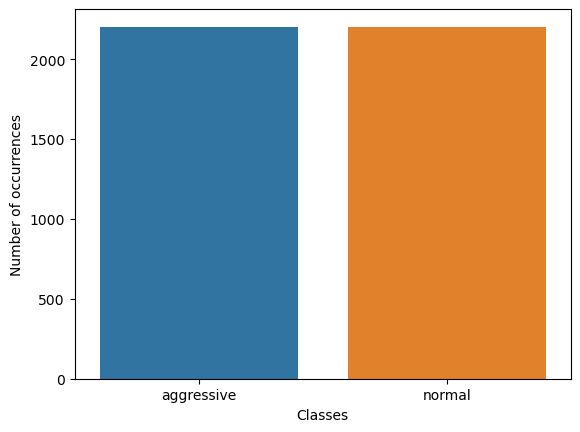

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(dataset, x='type')
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.show()

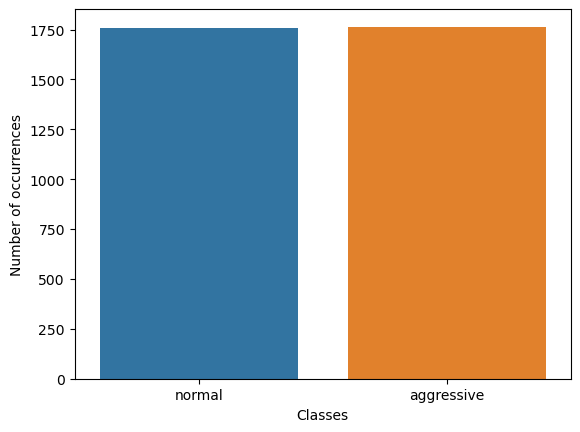

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train, x='type')
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.show()

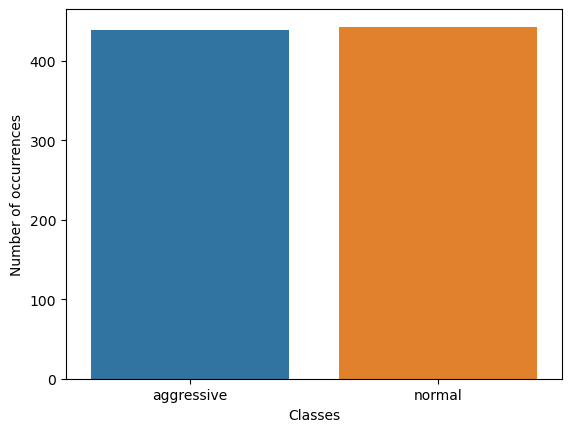

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(test, x='type')
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.show()

In [29]:

# convert labels from categorical to numeric
label_map = {
    'normal' : 0,
    'aggressive': 1,
}

In [30]:
train['Offensive'] = train['type'].apply(lambda x: label_map[x])
test['Offensive'] = test['type'].apply(lambda x: label_map[x])

In [31]:
train

,comment,type,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_comment,normalized_comment,text,noPunc_comment,clean_comment,clean_data,Offensive
0,يعطيكم الصحة,normal,2,12,5.500000,0,0,يعطيكم الصحة,ىعطىكم الصحه,ىعطىكم الصحه,يعطيكم الصحة,يعطيكم الصحة,ىعطىكم الصحه,0
2588,برو يلعن بو كذبكم ياافشلااامة فهمناكم فهمناااك...,aggressive,14,107,6.714286,0,0,برو يلعن بو كذبكم ياافشلااامة فهمناكم فهمناااك...,برو ىلعن بو كذبكم ىاافشلاامه فهمناكم فهمنااكم ...,برو ىلعن بو كذبكم ىاافشلاامه فهمناكم فهمنااكم ...,برو يلعن بو كذبكم ياافشلااامة فهمناكم فهمناااك...,برو يلعن بو كذبكم ياافشلااامة فهمناكم فهمناااك...,برو ىلعن بو كذبكم ىاافشلاامه فهمناكم فهمنااكم ...,1
866,الحق دومانها اسالها طرق النيك اسالها مثلا نيكت...,aggressive,21,126,5.047619,0,0,الحق دومانها اسالها طرق النيك اسالها مثلا نيكت...,الحق دومانها اسالها طرق النىك اسالها مثلا نىكت...,الحق دومانها اسالها طرق النىك اسالها مثلا نىكت...,الحق دومانها اسالها طرق النيك اسالها مثلا نيكت...,الحق دومانها اسالها طرق النيك اسالها مثلا نيكت...,الحق دومانها اسالها طرق النىك اسالها مثلا نىكت...,1
581,اساس الدين الاسلامي واذا ماعجبهم احكام الميراث...,aggressive,11,75,5.909091,0,0,اساس الدين الاسلامي واذا ماعجبهم احكام الميراث...,اساس الدىن الاسلامى واذا ماعجبهم احكام المىراث...,اساس الدىن الاسلامى واذا ماعجبهم احكام المىراث...,اساس الدين الاسلامي واذا ماعجبهم احكام الميراث...,اساس الدين الاسلامي واذا ماعجبهم احكام الميراث...,اساس الدىن الاسلامى واذا ماعجبهم احكام المىراث...,1
2255,تحية لاخوناننا الجزاأرييين الرجاء التبول المدع...,normal,7,52,6.571429,0,0,تحية لاخوناننا الجزاأرييين الرجاء التبول المدع...,تحىه لاخوناننا الجزاارىىن الرجاء التبول المدعو...,تحىه لاخوناننا الجزاارىىن الرجاء التبول المدعو...,تحية لاخوناننا الجزاأرييين الرجاء التبول المدع...,تحية لاخوناننا الجزاأرييين الرجاء التبول المدع...,تحىه لاخوناننا الجزاارىىن الرجاء التبول المدعو...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,normal,24,126,4.291667,0,0,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,تحدیات الدنیا یلزمها ایمان صادق وحتما ادنی ای ...,0
3928,شمس متربي,normal,2,9,4.000000,0,0,شمس متربي,شمس متربى,شمس متربى,شمس متربي,شمس متربي,شمس متربى,0
2526,يعاهر يولد دوله الدعاره والفسق تحني مسميين دول...,aggressive,12,73,5.166667,0,0,يعاهر يولد دوله الدعاره والفسق تحني مسميين دول...,ىعاهر ىولد دوله الدعاره والفسق تحنى مسمىىن دول...,ىعاهر ىولد دوله الدعاره والفسق تحنى مسمىىن دول...,يعاهر يولد دوله الدعاره والفسق تحني مسميين دول...,يعاهر يولد دوله الدعاره والفسق تحني مسميين دول...,ىعاهر ىولد دوله الدعاره والفسق تحنى مسمىىن دول...,1
2406,مخنتين بلاد الدعارة,aggressive,3,19,5.666667,0,0,مخنتين بلاد الدعارة,مخنتىن بلاد الدعاره,مخنتىن بلاد الدعاره,مخنتين بلاد الدعارة,مخنتين بلاد الدعارة,مخنتىن بلاد الدعاره,1


# Classification Model Development

In [32]:
# required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [33]:
# Feature extraction
train_feature = train.clean_data
train_target = train.Offensive

test_feature = test.clean_data
test_target = test.Offensive

## tfidf

In [36]:
# make pipeline (tdidf+logistic regression)
pipe = make_pipeline(TfidfVectorizer(),
                    LogisticRegression())

# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(pipe, param_grid, cv=5)
model.fit(train_feature,train_target)

# make prediction and print accuracy
prediction1 = model.predict(test_feature)

print(f"Accuracy score is {accuracy_score(test_target, prediction1):.2f}")
print(classification_report(test_target, prediction1))

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Accuracy score is 0.87
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       443
           1       0.89      0.85      0.87       439

    accuracy                           0.87       882
   macro avg       0.87      0.87      0.87       882
weighted avg       0.87      0.87      0.87       882



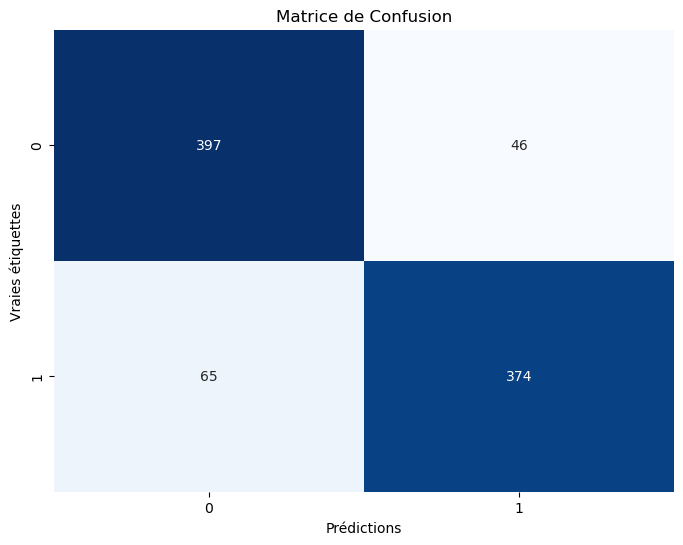

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la matrice de confusion
cm = confusion_matrix(test_target, prediction1)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [39]:
#Error Analysis

# printing misclassified normal samples
test['Prediction'] = prediction1
normal_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 0)]
normal_error

,comment,type,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_comment,normalized_comment,text,noPunc_comment,clean_comment,clean_data,Offensive,Prediction
2839,ولدي اليهود التوانسة فضل كبير شاركوا الحرب الا...,normal,57,354,5.228070,1,0,ولدي اليهود التوانسة فضل كبير شاركوا الحرب الا...,ولدى الىهود التوانسه فضل كبىر شاركوا الحرب الا...,ولدى الىهود التوانسه فضل كبىر شاركوا الحرب الا...,ولدي اليهود التوانسة فضل كبير شاركوا الحرب الا...,ولدي اليهود التوانسة فضل كبير شاركوا الحرب الا...,ولدى الىهود التوانسه فضل كبىر شاركوا الحرب الا...,0,1
830,كذاب اليهود حبايبنا تونس السيد روني وطني يحب ت...,normal,12,64,4.416667,0,0,كذاب اليهود حبايبنا تونس السيد روني وطني يحب ت...,كذاب الىهود حباىبنا تونس السىد رونى وطنى ىحب ت...,كذاب الىهود حباىبنا تونس السىد رونى وطنى ىحب ت...,كذاب اليهود حبايبنا تونس السيد روني وطني يحب ت...,كذاب اليهود حبايبنا تونس السيد روني وطني يحب ت...,كذاب الىهود حباىبنا تونس السىد رونى وطنى ىحب ت...,0,1
744,لعنة هالخلايق,normal,2,13,6.000000,0,0,لعنة هالخلايق,لعنه هالخلاىق,لعنه هالخلاىق,لعنة هالخلايق,لعنة هالخلايق,لعنه هالخلاىق,0,1
3532,دين يالتونسة حديث قهوة وتمجدو العاهرات ومتعطوش...,normal,12,71,5.000000,0,0,دين يالتونسة حديث قهوة وتمجدو العاهرات ومتعطوش...,دىن ىالتونسه حدىث قهوه وتمجدو العاهرات ومتعطوش...,دىن ىالتونسه حدىث قهوه وتمجدو العاهرات ومتعطوش...,دين يالتونسة حديث قهوة وتمجدو العاهرات ومتعطوش...,دين يالتونسة حديث قهوة وتمجدو العاهرات ومتعطوش...,دىن ىالتونسه حدىث قهوه وتمجدو العاهرات ومتعطوش...,0,1
3159,الانسانة كذابة وتحب تعمل مكان الاسئلة تافهة من...,normal,12,69,4.833333,0,0,الانسانة كذابة وتحب تعمل مكان الاسئلة تافهة من...,الانسانه كذابه وتحب تعمل مكان الاسئله تافهه من...,الانسانه كذابه وتحب تعمل مكان الاسئله تافهه من...,الانسانة كذابة وتحب تعمل مكان الاسئلة تافهة من...,الانسانة كذابة وتحب تعمل مكان الاسئلة تافهة من...,الانسانه كذابه وتحب تعمل مكان الاسئله تافهه من...,0,1
1982,يبقى رجل مرأة النساء أصبحوا رجال والرجال مكانة...,normal,12,74,5.250000,0,0,يبقى رجل مرأة النساء أصبحوا رجال والرجال مكانة...,ىبقى رجل مراه النساء اصبحوا رجال والرجال مكانه...,ىبقى رجل مراه النساء اصبحوا رجال والرجال مكانه...,يبقى رجل مرأة النساء أصبحوا رجال والرجال مكانة...,يبقى رجل مرأة النساء أصبحوا رجال والرجال مكانة...,ىبقى رجل مراه النساء اصبحوا رجال والرجال مكانه...,0,1
4334,تبدا عايش داعش طبق تحب عايش دولة دستور,normal,8,38,3.875000,0,0,تبدا عايش داعش طبق تحب عايش دولة دستور,تبدا عاىش داعش طبق تحب عاىش دوله دستور,تبدا عاىش داعش طبق تحب عاىش دوله دستور,تبدا عايش داعش طبق تحب عايش دولة دستور,تبدا عايش داعش طبق تحب عايش دولة دستور,تبدا عاىش داعش طبق تحب عاىش دوله دستور,0,1
3914,والله تحب امسح هادو تعليقات حر روحو بلاد لملاح...,normal,11,55,4.090909,0,0,والله تحب امسح هادو تعليقات حر روحو بلاد لملاح...,والله تحب امسح هادو تعلىقات حر روحو بلاد لملاح...,والله تحب امسح هادو تعلىقات حر روحو بلاد لملاح...,والله تحب امسح هادو تعليقات حر روحو بلاد لملاح...,والله تحب امسح هادو تعليقات حر روحو بلاد لملاح...,والله تحب امسح هادو تعلىقات حر روحو بلاد لملاح...,0,1
186,لادن رحمه والظواهري حفظه ارهابي يترضى الارهاب ...,normal,15,96,5.466667,1,0,لادن رحمه والظواهري حفظه ارهابي يترضى الارهاب ...,لادن رحمه والظواهرى حفظه ارهابى ىترضى الارهاب ...,لادن رحمه والظواهرى حفظه ارهابى ىترضى الارهاب ...,لادن رحمه والظواهري حفظه ارهابي يترضى الارهاب ...,لادن رحمه والظواهري حفظه ارهابي يترضى الارهاب ...,لادن رحمه والظواهرى حفظه ارهابى ىترضى الارهاب ...,0,1
8,تونس الكافر والمسلم مسلمين وأغلبهم كفار معاش ن...,normal,19,116,5.157895,0,0,تونس الكافر والمسلم مسلمين وأغلبهم كفار معاش ن...,تونس الكافر والمسلم مسلمىن واغلبهم كفار معاش ن...,تونس الكافر والمسلم مسلمىن واغلبهم كفار معاش ن...,تونس الكافر والمسلم مسلمين وأغلبهم كفار معاش ن...,تونس الكافر والمسلم مسلمين وأغلبهم كفار معاش ن...,تونس الكافر والمسلم مسلمىن واغلبهم كفار معاش ن...,0,1


In [40]:
# printing misclassified abusive samples
test['Prediction'] = prediction1
aggressive_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 1)]
aggressive_error

,comment,type,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_comment,normalized_comment,text,noPunc_comment,clean_comment,clean_data,Offensive,Prediction
421,السلاف الجهادي خطير الاءمة الاءسلامية,aggressive,5,37,6.600000,0,0,السلاف الجهادي خطير الاءمة الاءسلامية,السلاف الجهادى خطىر الاءمه الاءسلامىه,السلاف الجهادى خطىر الاءمه الاءسلامىه,السلاف الجهادي خطير الاءمة الاءسلامية,السلاف الجهادي خطير الاءمة الاءسلامية,السلاف الجهادى خطىر الاءمه الاءسلامىه,1,0
3326,تفي ليوم الدين,aggressive,3,14,4.000000,0,0,تفي ليوم الدين,تفى لىوم الدىن,تفى لىوم الدىن,تفي ليوم الدين,تفي ليوم الدين,تفى لىوم الدىن,1,0
903,يشرفني كتونسي الانتماء للامة الاسلامية خرجنا ا...,aggressive,12,83,6.000000,0,0,يشرفني كتونسي الانتماء للامة الاسلامية خرجنا ا...,ىشرفنى كتونسى الانتماء للامه الاسلامىه خرجنا ا...,ىشرفنى كتونسى الانتماء للامه الاسلامىه خرجنا ا...,يشرفني كتونسي الانتماء للامة الاسلامية خرجنا ا...,يشرفني كتونسي الانتماء للامة الاسلامية خرجنا ا...,ىشرفنى كتونسى الانتماء للامه الاسلامىه خرجنا ا...,1,0
3841,تربحكم انشأ تخافون الاسلام يعذبكم عذاب كبييييي...,aggressive,54,304,4.648148,2,0,تربحكم انشأ تخافون الاسلام يعذبكم عذاب كبييييي...,تربحكم انشا تخافون الاسلام ىعذبكم عذاب كبىىر ى...,تربحكم انشا تخافون الاسلام ىعذبكم عذاب كبىىر ى...,تربحكم انشأ تخافون الاسلام يعذبكم عذاب كبييييي...,تربحكم انشأ تخافون الاسلام يعذبكم عذاب كبييييي...,تربحكم انشا تخافون الاسلام ىعذبكم عذاب كبىىر ى...,1,0
4003,متمرد الأبد يجلدوه قليل حشاك لزم ينيکوه,aggressive,7,39,4.714286,0,0,متمرد الأبد يجلدوه قليل حشاك لزم ينيکوه,متمرد الابد ىجلدوه قلىل حشاك لزم ىنىکوه,متمرد الابد ىجلدوه قلىل حشاك لزم ىنىکوه,متمرد الأبد يجلدوه قليل حشاك لزم ينيکوه,متمرد الأبد يجلدوه قليل حشاك لزم ينيکوه,متمرد الابد ىجلدوه قلىل حشاك لزم ىنىکوه,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,مريم تحب نشفلك طبيب نفساني اسمي رجاء عمري ونشا...,aggressive,16,83,4.250000,0,0,مريم تحب نشفلك طبيب نفساني اسمي رجاء عمري ونشا...,مرىم تحب نشفلك طبىب نفسانى اسمى رجاء عمرى ونشا...,مرىم تحب نشفلك طبىب نفسانى اسمى رجاء عمرى ونشا...,مريم تحب نشفلك طبيب نفساني اسمي رجاء عمري ونشا...,مريم تحب نشفلك طبيب نفساني اسمي رجاء عمري ونشا...,مرىم تحب نشفلك طبىب نفسانى اسمى رجاء عمرى ونشا...,1,0
3574,عباد تافهين,aggressive,2,11,5.000000,0,0,عباد تافهين,عباد تافهىن,عباد تافهىن,عباد تافهين,عباد تافهين,عباد تافهىن,1,0
1151,المـهــاجـرة هههههه شعب تركي يصومون كذاب علمان...,aggressive,17,109,5.470588,0,0,المـهــاجـرة هههههه شعب تركي يصومون كذاب علمان...,المـهــاجـره هه شعب تركى ىصومون كذاب علمانىىن ...,المهاجره هه شعب تركى ىصومون كذاب علمانىىن مسلم...,المهاجرة هههههه شعب تركي يصومون كذاب علمانيين ...,المـهــاجـرة هههههه شعب تركي يصومون كذاب علمان...,المهاجره هه شعب تركى ىصومون كذاب علمانىىن مسلم...,1,0
2829,يعطك بوووز وجه الهم جيتها تونس دخلت جبل منحطة ...,aggressive,36,200,4.583333,0,0,يعطك بوووز وجه الهم جيتها تونس دخلت جبل منحطة ...,ىعطك بووز وجه الهم جىتها تونس دخلت جبل منحطه ب...,ىعطك بووز وجه الهم جىتها تونس دخلت جبل منحطه ب...,يعطك بوووز وجه الهم جيتها تونس دخلت جبل منحطة ...,يعطك بوووز وجه الهم جيتها تونس دخلت جبل منحطة ...,ىعطك بووز وجه الهم جىتها تونس دخلت جبل منحطه ب...,1,0


In [41]:
len(normal_error)

46

In [42]:
len(aggressive_error)

65

In [43]:
## make pipeline (tdidf+NB)

from sklearn.naive_bayes import MultinomialNB

# Create a pipeline
pipe1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Define the parameter grid
param_grid1 = {'multinomialnb__alpha': [0.01, 0.1, 1, 10, 100]}

# Create and fit the model using grid search
model1 = GridSearchCV(pipe1, param_grid1, cv=5)
model1.fit(train_feature, train_target)

# make prediction and print accuracy
prediction2 = model1.predict(test_feature)
print(f"Accuracy score is {accuracy_score(test_target, prediction2):.2f}")
print(classification_report(test_target, prediction2))

Accuracy score is 0.87
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       443
           1       0.86      0.88      0.87       439

    accuracy                           0.87       882
   macro avg       0.87      0.87      0.87       882
weighted avg       0.87      0.87      0.87       882



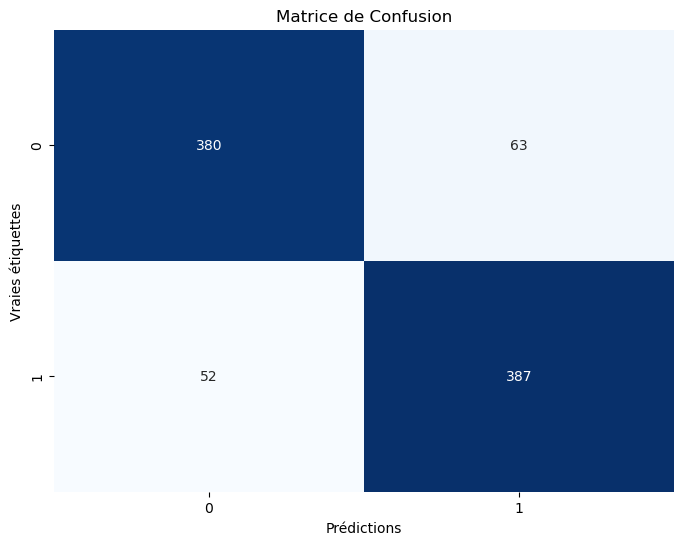

In [44]:
# Création de la matrice de confusion
cm = confusion_matrix(test_target, prediction2)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [45]:
#Error Analysis

# printing misclassified normal samples
test['Prediction'] = prediction2
normal_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 0)]

# printing misclassified abusive samples
test['Prediction'] = prediction2
aggressive_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 1)]



In [46]:
len(normal_error)

63

In [47]:
len(aggressive_error)

52

In [48]:
    ## make pipeline (tdidf+RandomForest)
from sklearn.ensemble import RandomForestClassifier

# Create the pipeline
pipe2 = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

param_grid2 = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30]
}


# Create and fit the model using grid search
model2 = GridSearchCV(pipe2, param_grid2, cv=5)
model2.fit(train_feature, train_target)

# make prediction and print accuracy
prediction3 = model2.predict(test_feature)
print(f"Accuracy score is {accuracy_score(test_target, prediction3):.2f}")
print(classification_report(test_target, prediction3))

Accuracy score is 0.87
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       443
           1       0.91      0.81      0.86       439

    accuracy                           0.87       882
   macro avg       0.87      0.87      0.87       882
weighted avg       0.87      0.87      0.87       882



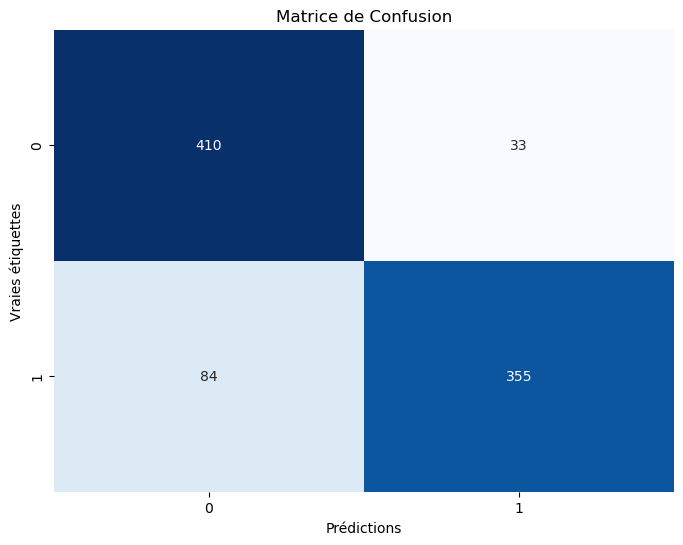

In [49]:
# Création de la matrice de confusion
cm = confusion_matrix(test_target, prediction3)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [50]:
#Error Analysis

# printing misclassified normal samples
test['Prediction'] = prediction3
normal_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 0)]

# printing misclassified abusive samples
test['Prediction'] = prediction3
aggressive_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 1)]

In [51]:
len(normal_error)

33

In [52]:
len(aggressive_error)

84

In [53]:
## make pipeline (tdidf+SVM)
from sklearn.svm import LinearSVC  # Import LinearSVC

# Create a pipeline with TfidfVectorizer and LinearSVC
pipe3 = make_pipeline(TfidfVectorizer(), LinearSVC())

# Define the parameter grid for LinearSVC
param_grid3 = {'linearsvc__C': [0.01, 0.1, 1, 10, 100]}

# Create and fit the model using grid search
model3 = GridSearchCV(pipe3, param_grid3, cv=5)
model3.fit(train_feature, train_target)

# make prediction and print accuracy
prediction4= model3.predict(test_feature)
print(f"Accuracy score is {accuracy_score(test_target, prediction4):.2f}")
print(classification_report(test_target, prediction4))

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.p

Accuracy score is 0.87
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       443
           1       0.89      0.85      0.87       439

    accuracy                           0.87       882
   macro avg       0.87      0.87      0.87       882
weighted avg       0.87      0.87      0.87       882



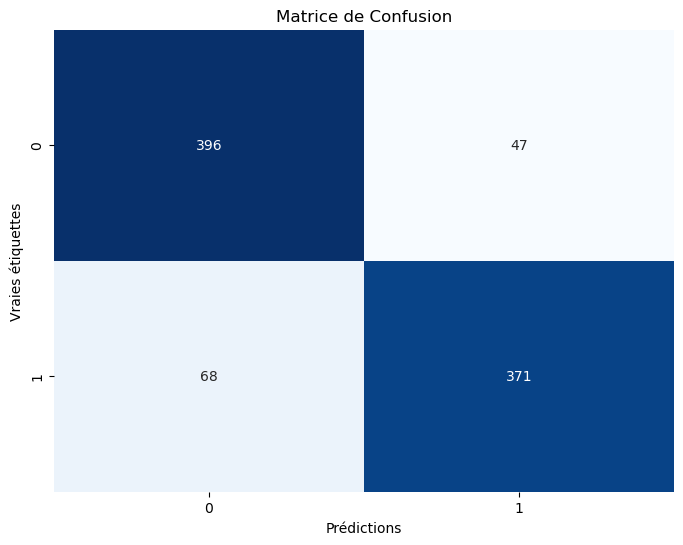

In [54]:
# Création de la matrice de confusion
cm = confusion_matrix(test_target, prediction4)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [55]:
#Error Analysis

# printing misclassified normal samples
test['Prediction'] = prediction4
normal_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 0)]

# printing misclassified abusive samples
test['Prediction'] = prediction4
aggressive_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 1)]

In [56]:
len(normal_error)

47

In [57]:
len(aggressive_error)

68

In [55]:
# Créer des matrices de confusion
svm_cm = confusion_matrix(test_target,prediction4)
naive_bayes_cm = confusion_matrix(test_target, prediction2)
random_forest_cm = confusion_matrix(test_target, prediction3)
logistic_regression_cm = confusion_matrix(test_target,prediction1)


## bag of words

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# make pipeline (bow+logistic regression)
pipe = make_pipeline(CountVectorizer(),
                    LogisticRegression())

# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(pipe, param_grid, cv=5)
model.fit(train_feature,train_target)

# make prediction and print accuracy
prediction = model.predict(test_feature)
print(f"Accuracy score is {accuracy_score(test_target, prediction):.2f}")
print(classification_report(test_target, prediction))

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Accuracy score is 0.88
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       443
           1       0.92      0.84      0.87       439

    accuracy                           0.88       882
   macro avg       0.88      0.88      0.88       882
weighted avg       0.88      0.88      0.88       882



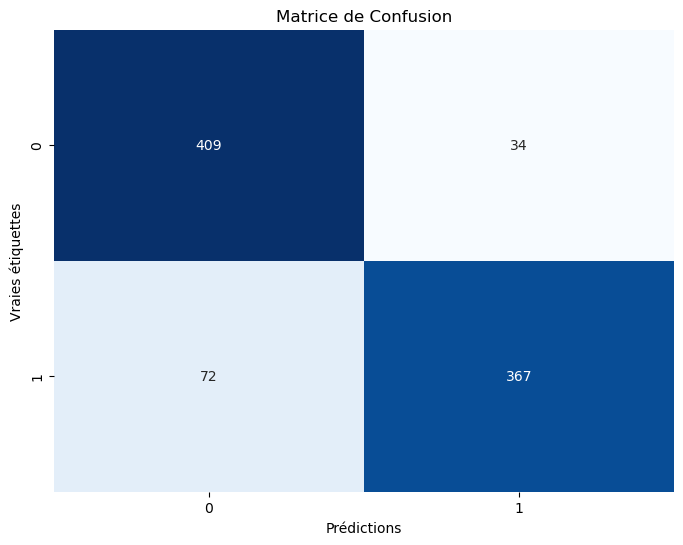

In [59]:
# Création de la matrice de confusion
cm = confusion_matrix(test_target, prediction)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [60]:
#Error Analysis

# printing misclassified normal samples
test['Prediction'] = prediction
normal_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 0)]

# printing misclassified aggressive samples
test['Prediction'] = prediction
aggressive_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 1)]

In [61]:
len(normal_error)

34

In [62]:
len(aggressive_error)

72

In [63]:
## make pipeline (Countvectorizer()+NB)


# Create a pipeline
pipe1 = make_pipeline(CountVectorizer(), MultinomialNB())

# Define the parameter grid
param_grid1 = {'multinomialnb__alpha': [0.01, 0.1, 1, 10, 100]}

# Create and fit the model using grid search
model1 = GridSearchCV(pipe1, param_grid1, cv=5)
model1.fit(train_feature, train_target)

# make prediction and print accuracy
prediction = model1.predict(test_feature)
print(f"Accuracy score is {accuracy_score(test_target, prediction):.2f}")
print(classification_report(test_target, prediction))

Accuracy score is 0.85
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       443
           1       0.83      0.88      0.85       439

    accuracy                           0.85       882
   macro avg       0.85      0.85      0.85       882
weighted avg       0.85      0.85      0.85       882



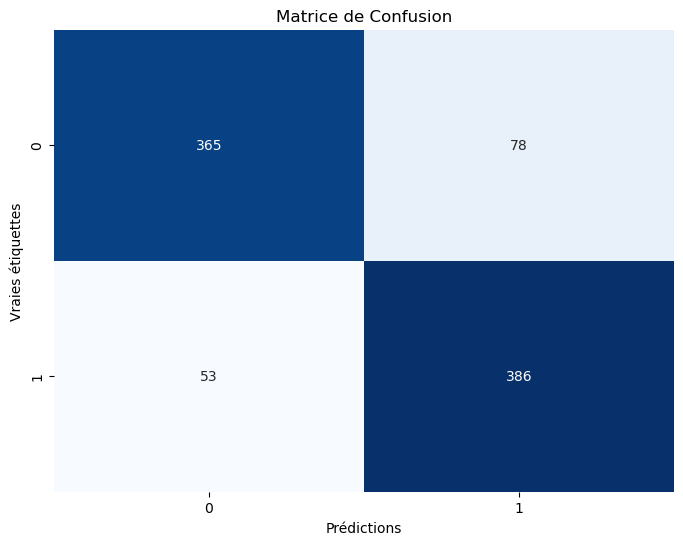

In [64]:
# Création de la matrice de confusion
cm = confusion_matrix(test_target, prediction)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [65]:
#Error Analysis

# printing misclassified normal samples
test['Prediction'] = prediction
normal_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 0)]

# printing misclassified aggressive samples
test['Prediction'] = prediction
aggressive_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 1)]

In [66]:
len(normal_error)

78

In [67]:
len(aggressive_error)

53

In [68]:
## make pipeline (Countvectorizer()+randomforest)

# Create the pipeline
pipe2 = make_pipeline(CountVectorizer(), RandomForestClassifier())

param_grid2 = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30]
}


# Create and fit the model using grid search
model2 = GridSearchCV(pipe2, param_grid2, cv=5)
model2.fit(train_feature, train_target)

# make prediction and print accuracy
prediction = model2.predict(test_feature)
print(f"Accuracy score is {accuracy_score(test_target, prediction):.2f}")
print(classification_report(test_target, prediction))

Accuracy score is 0.88
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       443
           1       0.94      0.80      0.87       439

    accuracy                           0.88       882
   macro avg       0.88      0.88      0.88       882
weighted avg       0.88      0.88      0.88       882



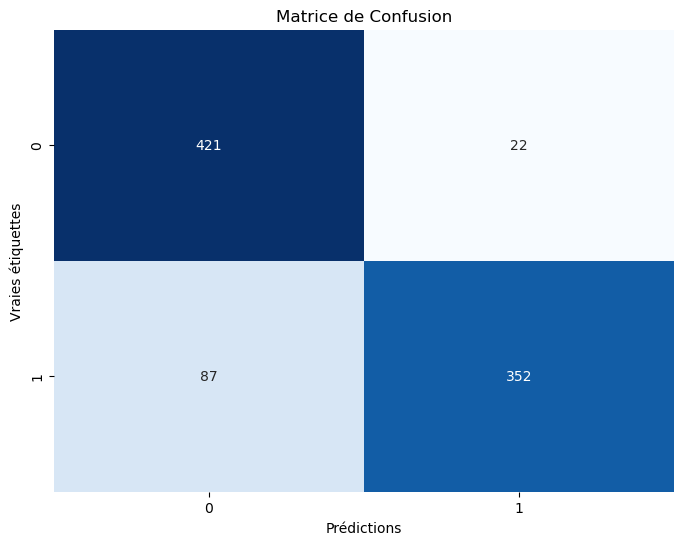

In [69]:
# Création de la matrice de confusion
cm = confusion_matrix(test_target, prediction)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [70]:
#Error Analysis

# printing misclassified normal samples
test['Prediction'] = prediction
normal_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 0)]

# printing misclassified aggressive samples
test['Prediction'] = prediction
aggressive_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 1)]

In [71]:
len(normal_error)

22

In [72]:
len(aggressive_error)

87

In [73]:
#make pipeline (bag of words +SVM)

# Create a pipeline with CountVectorizer(bag of words) and LinearSVC
pipe3 = make_pipeline(CountVectorizer(), LinearSVC())

# Define the parameter grid for LinearSVC
param_grid3 = {'linearsvc__C': [0.01, 0.1, 1, 10, 100]}

# Create and fit the model using grid search
model3 = GridSearchCV(pipe3, param_grid3, cv=5)
model3.fit(train_feature, train_target)

# make prediction and print accuracy
prediction = model3.predict(test_feature)
print(f"Accuracy score is {accuracy_score(test_target, prediction):.2f}")
print(classification_report(test_target, prediction))

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.p

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy score is 0.88
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       443
           1       0.91      0.84      0.87       439

    accuracy                           0.88       882
   macro avg       0.88      0.88      0.88       882
weighted avg       0.88      0.88      0.88       882



C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


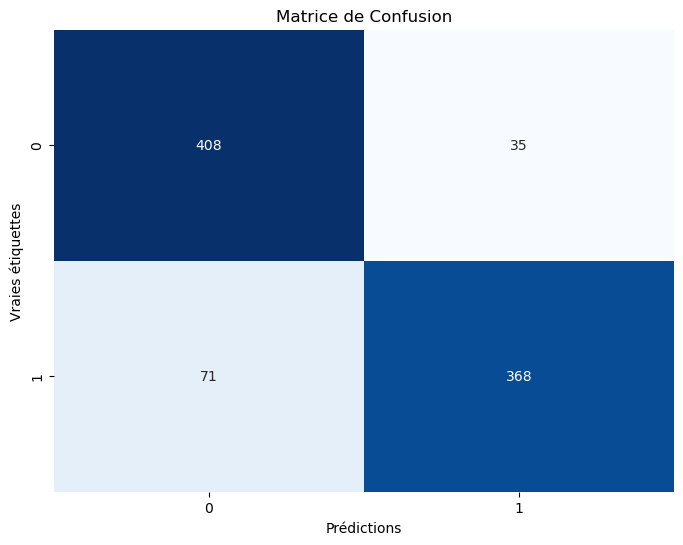

In [74]:
# Création de la matrice de confusion
cm = confusion_matrix(test_target, prediction)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [75]:
#Error Analysis

# printing misclassified normal samples
test['Prediction'] = prediction
normal_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 0)]

# printing misclassified aggressive samples
test['Prediction'] = prediction
aggressive_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 1)]

In [76]:
len(normal_error)

35

In [77]:
len(aggressive_error)

71